## Importing the dataset

In [1]:
import pandas as pd
import numpy as np
from fbprophet import Prophet
import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")# for pretty graphs
df = pd.read_excel('medium_stats.xlsx')
df.head()

,Date,Views
0,2018-07-02,21
1,2018-07-03,45
2,2018-07-04,31
3,2018-07-05,25
4,2018-07-06,31


## Analysing the datatypes

In [2]:
df.dtypes

Date     datetime64[ns]
Views             int64
dtype: object

## Plotting to get insights

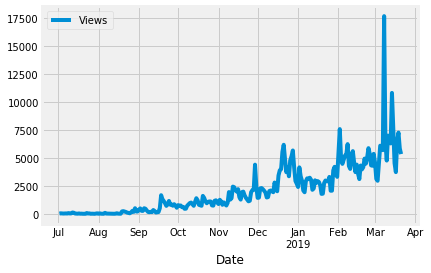

In [3]:
df.set_index('Date').plot();

## Removing the Outliers

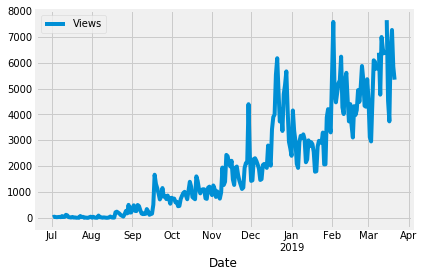

In [4]:
df.loc[(df['Views'] > 10000), 'Views'] = np.nan
df.set_index('Date').plot();

## Making the dataset 'Prophet' compliant.

In [5]:
df.columns = ['ds','y']
df.head()

,ds,y
0,2018-07-02,21.0
1,2018-07-03,45.0
2,2018-07-04,31.0
3,2018-07-05,25.0
4,2018-07-06,31.0


## Making Predictions

Prophet follows the sklearn model API wherein an instance of the Prophet class is created and then the fit and predict methods are called. The model is instantiated by a new Prophet object and followed by calling its fit method and passing in the historical dataframe.

In [6]:
m1 = Prophet(daily_seasonality=True)
m1.fit(df)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
C:\Users\Parul\Anaconda3\lib\site-packages\pystan\misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


Prophet will by default fit weekly and yearly seasonalities if the time series is more than two cycles long. It will also fit daily seasonality for a sub-daily time series. You can add other seasonalities (monthly, quarterly, hourly)if required.

In [7]:
future1 = m1.make_future_dataframe(periods=60)
forecast1 = m1.predict(future1)
forecast1.tail().T

,318,319,320,321,322
ds,2019-05-16 00:00:00,2019-05-17 00:00:00,2019-05-18 00:00:00,2019-05-19 00:00:00,2019-05-20 00:00:00
trend,7685.3,7716.36,7747.43,7778.49,7809.56
yhat_lower,6454.77,6684.58,6210.95,6027.05,6577.16
yhat_upper,8355.35,8579.33,8172,8021.62,8459.32
trend_lower,7596.62,7625.72,7654.93,7683.9,7712.86
trend_upper,7763.03,7796.29,7828.85,7862.87,7895.38
additive_terms,-256.056,-143.888,-548.993,-780.104,-248.801
additive_terms_lower,-256.056,-143.888,-548.993,-780.104,-248.801
additive_terms_upper,-256.056,-143.888,-548.993,-780.104,-248.801
daily,-353.501,-353.501,-353.501,-353.501,-353.501


In [8]:
forecast1[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
318,2019-05-16,7429.240846,6454.767367,8355.345604
319,2019-05-17,7572.473604,6684.579107,8579.331218
320,2019-05-18,7198.434012,6210.947171,8172.000091
321,2019-05-19,6998.389223,6027.045563,8021.623944
322,2019-05-20,7560.757534,6577.158926,8459.318670


## Plotting the Forecast

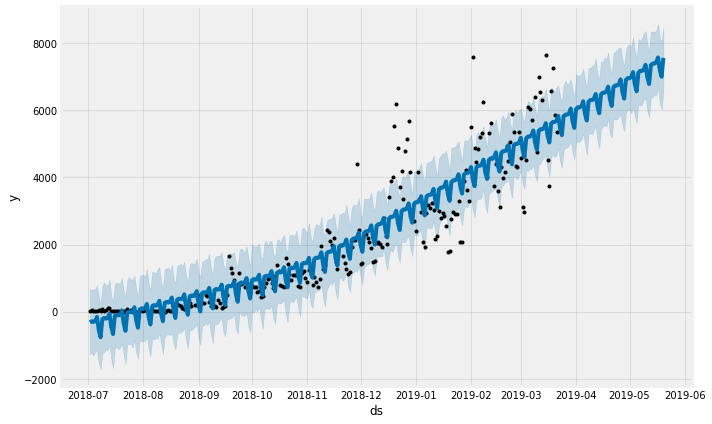

In [9]:
m1.plot(forecast1);

## Plotting the forecast components

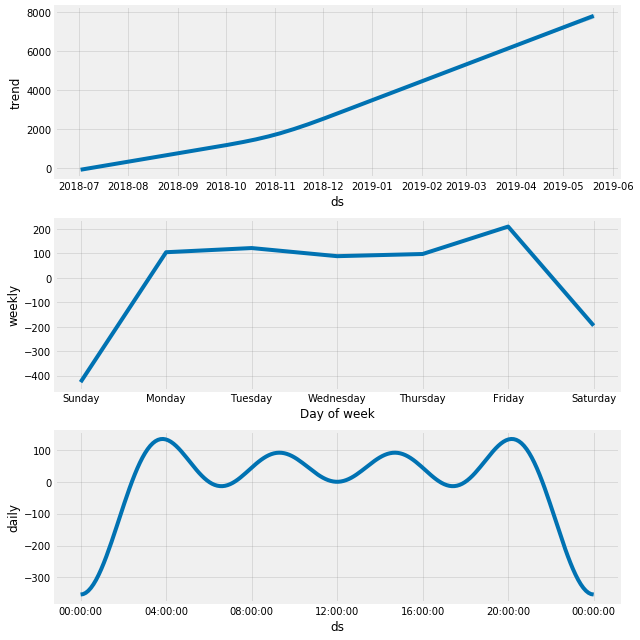

In [10]:
m1.plot_components(forecast1);

## Holiday Effect

In [12]:

articles = pd.DataFrame({
  'holiday': 'Article_Published',
  'ds': pd.to_datetime(['2018-07-02', '2018-07-06', '2018-07-08',
                        '2018-07-09', '2018-07-12', '2018-07-19', '2018-07-26', '2018-07-31',
                        '2018-08-06', '2018-08-15', '2018-07-19', '2018-08-26', '2018-08-31',
                        '2018-09-01', '2018-09-04', '2018-09-11', '2018-09-17', '2018-09-23',
                        '2018-10-02', '2018-10-09', '2018-10-18', '2018-10-19', '2018-10-26',
                        '2018-11-02', '2018-11-08', '2018-11-24', '2018-12-05', '2018-12-13',
                        '2018-12-19', '2018-12-24', '2018-12-27', '2019-01-08', '2019-01-11',
                        '2019-01-22', '2019-01-24', '2019-01-28', '2019-02-01', '2019-02-04',
                        '2019-02-07', '2019-02-12', '2019-02-15', '2019-02-21', '2019-03-03',
                        '2019-03-07', '2019-03-12', '2019-03-18', '2019-03-23' ]),
  'lower_window': 0,
  'upper_window': 5,
})
articles.head()

,holiday,ds,lower_window,upper_window
0,Article_Published,2018-07-02,0,5
1,Article_Published,2018-07-06,0,5
2,Article_Published,2018-07-08,0,5
3,Article_Published,2018-07-09,0,5
4,Article_Published,2018-07-12,0,5


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


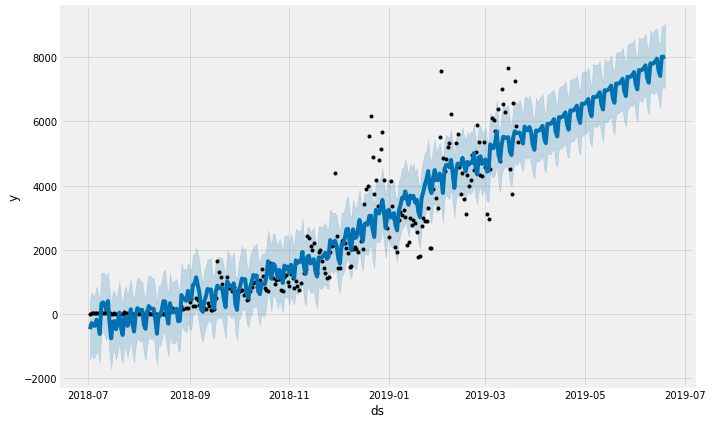

In [13]:
m2 = Prophet(holidays=articles,daily_seasonality=True).fit(df)
future2 = m2.make_future_dataframe(periods=90)
forecast2 = m2.predict(future2)
m2.plot(forecast2);

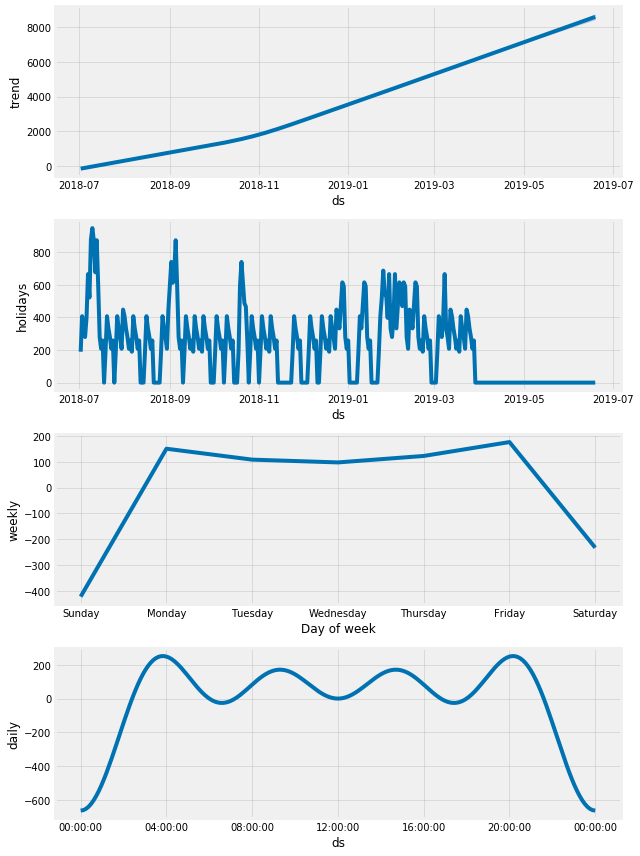

In [14]:
m2.plot_components(forecast2);

## Predicting Views for the next 15 days

In [15]:
m3 = Prophet(holidays=articles, mcmc_samples=300).fit(df)
future3 = m3.make_future_dataframe(periods=60)
forecast3 = m3.predict(future3)
forecast3["Views"] = (forecast3.yhat).round()
forecast3["Views_lower"] = (forecast3.yhat_lower).round()
forecast3["Views_upper"] = (forecast3.yhat_upper).round()
forecast3[(forecast3.ds > "3-22-2019") &
          (forecast3.ds < "4-07-2019")][["ds","Views_lower",
                                        "Views", "Views_upper"]]

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds,Views_lower,Views,Views_upper
264,2019-03-23,4634.0,5668.0,6684.0
265,2019-03-24,4470.0,5468.0,6502.0
266,2019-03-25,4965.0,5996.0,7025.0
267,2019-03-26,4927.0,5941.0,6971.0
268,2019-03-27,4789.0,5893.0,6864.0
269,2019-03-28,5029.0,6033.0,6976.0
270,2019-03-29,4852.0,5869.0,6903.0
271,2019-03-30,4440.0,5489.0,6597.0
272,2019-03-31,4303.0,5329.0,6316.0
273,2019-04-01,4952.0,5930.0,6941.0


## Exporting the results to Excel

In [20]:
forecast3.to_excel('Predicted_Views.xlsx')